Before starting, run the cell below to import the required dependencies for the examples in this notebook:

In [1]:
import numpy as np                         # For numbers, arrays, matrices
import matplotlib                          # For plotting
import matplotlib.pyplot as plt

# Modulation and beats

This notebook is all about modulation and beats. These are fundamental concepts required for understanding how signals arise in cavities and how cavities can be controlled. This first notebook briefly visits the theory and has some examples for you to try, and the next notebook has some exercises for you to try with Finesse.

The derivations are based on those from the <a ref="https://doi.org/10.1007/s41114-016-0002-8">Interferometer techniques for gravitational-wave detection</a> review article. Please refer to that article, particularly sections 3 and 4, for further background on the concepts covered here.

![Amplitude modulation](assets/amplitude-modulation.svg)

## Modulation

Modulation is the process of varying one or more properties of a waveform. Modulation can be produced intentionally in a number of ways, e.g.:

 - By reflecting light from a moving mirror
 - By using an *electro-optic modulator*

We can also get unintentional modulation due to noise coupling into the light within the cavity, such as from seismic motion. We will see later that it's useful to intentionally add modulation for the purposes of control.

## Types of modulation

Modulation of electromagnetic waves comes in three flavours:

 - Amplitude modulation
 - Phase modulation
 - Frequency modulation

<div style="background-color:#cceffc;padding:10px;">
    
### Question: Examples

Can you think of an everyday item or system which uses each of these principles?

</div>

## Amplitude modulation

Amplitude modulation is used to encode information as a time dependent amplitude of a carrier wave. The technique is most famously known for being used for radio broadcasting.

In amplitude modulation, a signal is encoded in the amplitude of a carrier field. Suppose we have a carrier field:

$$E_c(t) = E_0\cos\big(2\pi f_\mathrm{c} t + \varphi_c \big)$$

Here, $E_0$ is the initial field amplitude, $f_c$ is our carrier frequency (the laser's frequency, i.e. $\frac{c_0}{\lambda_0}$), $t$ is time and $\phi_c$ is an arbitrary phase offset.

Furthermore, suppose that we have a sinusoidal signal that we amplitude modulate onto the carrier field:

$$x(t) = m\sin(2\pi f_\mathrm{m} t + \varphi_\mathrm{m}),$$

The modulated field is then described by

$$\begin{align}
E(t) = E_0\cos \big( 2\pi f_\mathrm{c} t + \varphi_c \big) \big( 1 + m\sin(2\pi f_\mathrm{m} t + \varphi_\mathrm{m}) \big).
\end{align}$$

Here, the modulation frequency $f_m$ determines how quickly the amplitude changes, the modulation index $m$ determines how large the amplitude fluctuations are, and the modulation phase $\phi_m$ is a constant phase term of the signal.

For amplitude modulation, the modulation index must be between 0 and 1, where 1 corresponds to the instantaneous amplitude reaching down to zero at the minimum.

<div style="background-color:#cceffc;padding:10px;">
    
### Question: energy conservation

Does the amplitude modulation described by the above equation add energy to the field?

</div>

### Visualising amplitude modulation

We can see an example of amplitude modulation below, where the figure is generated by using a carrier frequency $f_c = 20 \text{Hz}$, a modulation frequency $f_m = 2 \text{Hz}$, and a modulation index $m = 0.9$. Normally $f_m \ll f_c$, but for visualisation purposes we exaggerate the modulation frequency. Both the overall phase term $\phi_c$ and the modulation phase term $\phi_m$ are set to zero.

Run the cell below to produce the plot:

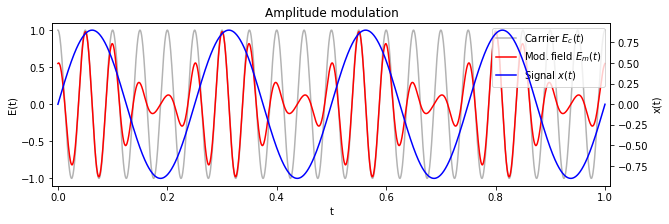

In [12]:
## Code for showing an amplitude modulated field ##

# Parameters
# --------------------------------------------------
t = np.linspace(0,1,2048)   # Time array
E0 = 1                      # Amplitude of the field.
fc = 20                     # Carrier freq
phi_c = 0                   # Phase of the field
fm = 4                      # Amplitude modulation freq
m = 0.9                     # Modulation index [0,1]
phi_m = 0                   # Modulation phase

# Computing the fields and signal arrays
# --------------------------------------------------
# Carrier field
E = E0*np.cos(fc*2*np.pi*t + phi_c)
# Signal 
x = m*np.sin(fm*2*np.pi*t + phi_m)
# Phase modulated field
E_m = E0*np.cos(fc*2*np.pi*t + phi_c)*(1 - (m/2)*(1-np.sin(fm*2*np.pi*t+phi_m) ))

# Plotting
# --------------------------------------------------
fig = plt.figure(figsize=(10,3))

# Axis for carrier and modulated field
ax = plt.subplot(1,1,1)
p1 = ax.plot(t,E,'0.7', label='$\mathrm{Carrier}\ E_c(t)$')
p2 = ax.plot(t,E_m,'r',label='$\mathrm{Mod. field}\ E_m(t)$')
ax.set_xlabel('t')
ax.set_ylabel('E(t)')
ax.set_title('Amplitude modulation')
ax.set_xlim(-0.01,1.01)

# Second y-axis for signal
ax2 = ax.twinx()
p3 = ax2.plot(t,x,'b', label='$\mathrm{Signal}\ x(t)$')
ax2.set_ylabel('x(t)')

# The legend
plots = p1+p2+p3
labs = [lab.get_label() for lab in plots]
ax.legend(plots, labs, loc=1, fontsize=10)

# Showing figure
plt.show(fig)

<div style="background-color:#cceffc;padding:10px;">
    
### Task: Varying parameters

Try changing the parameters of the above modulation ($E_0$, $f_c$, $\phi_c$, $f_m$, $m$ and $\phi_m$) to get a feel for what is important.

</div>

### Amplitude modulation in the sideband picture

Using complex notation, an amplitude modulated field at an arbitrary fixed point in space can be described by

$$\begin{align}
E_\mathrm{m}(t) = E_0\exp \Big(i\big( 2\pi f_\mathrm{c} t \big) \Big)\Big( 1 - \frac{m}{2}\big(1 - \sin(2\pi f_\mathrm{m} t + \varphi_\mathrm{m}) \big) \Big) ,
\end{align}$$

where the constant phase term of the carrier $\phi_c$ has been absorbed into the now complex amplitude $E_0$. By using the Euler identity $\sin(\phi) = \big( \mathrm{e}^{i\phi}-\mathrm{e}^{-i\phi}\big) /2i$, we can write this as

$$\begin{align}
E_\mathrm{m}(t) =& E_0\mathrm{e}^{2\pi i f_\mathrm{c} t}
\bigg[ 1 - \frac{m}{2} - \frac{im}{4}
\Big( \mathrm{e}^{i ( 2\pi f_\mathrm{m} t + \varphi_\mathrm{m} )} -
\mathrm{e}^{-i ( 2\pi f_\mathrm{m} t + \varphi_\mathrm{m})}
\Big)
\bigg] \\
=& a_0 \mathrm{e}^{2\pi i f_c t} + a_- \mathrm{e}^{2\pi i f_- t} + a_+ \mathrm{e}^{2\pi i f_+ t} ,
\end{align}$$

where $f\pm = f_c \pm f_m$. So for amplitude modulation, we always get exactly one pair of sidebands, as seen in the figure below.

<img src="assets/amplitude_sidebands.png" alt="Amplitude modulation sidebands" width="700" >


## Phase modulation

Phase modulation encodes information as a time dependent phase factor of a carrier wave. The phase modulation can be added on purpose to transmit information, which is utilised in a wide range of radio wave based technologies, such as satellite TV, in the mobile phone grid and WiFi.

In phase modulation, a signal is encoded in the phase of a carrier field. Suppose we have a carrier field $E_c \left( t \right) = E_0 \cos \left( 2 \pi f_c t + \phi_c \right)$, where $E_0$ is the amplitude, $f_c$ is the frequency and $\phi_c$ is a phase term. Furthermore, suppose that the signal that is phase modulated onto the carrier field is $x\left( t \right) = m \sin \left( 2 \pi f_m t + \phi_m \right)$, then the modulated field is described by

$$\begin{align}
E(t) =& E_0\cos \big[ 2\pi f_\mathrm{c} t + \phi_c + x(t) \big] \\
=& E_0\cos \big[ 2\pi f_\mathrm{c} t + \phi_c + m\sin(2\pi f_\mathrm{m} t + \phi_\mathrm{m}) \big] .
\end{align}$$

The *modulation frequency* $f_m$ determines how quickly the phase changes, the *modulation index* (sometimes called the *modulation depth*) $m$ determines the amplitude of the phase oscillations, and the *modulation phase* $\phi_m$ is a constant phase term of the signal.

When the modulation index is low, as usually the case in gravitational wave interferometers, the phase modulation can be described alternatively by

$$
E=E_0~\exp {\left( \mathrm {i}\,2 \pi f_c \,t\right) }~\left( 1-\frac{m^2}{4}+\mathrm {i}\,\frac{m}{2}\Bigl (\exp {\left( -\mathrm {i}\,2 \pi f_m \,t\right) }+\exp {\left( \mathrm {i}\,2 \pi f_m \,t\right) }\Bigr )\right),
$$

which shows only the first sideband pair at $\pm f_m$. To calculate the sidebands to higher orders, one can employ the following equation:

$$
E=E_0~\exp {\left( \mathrm {i}\,2 \pi f_c \,t\right) }~\sum _{k=-order}^{order}i^{\,k}~J_k(m)~\exp {\left( \mathrm {i}\,k 2 \pi f_m \,t\right) },
$$

where $J_k(m)$ is a Bessel function of the first kind.

### Visualising phase modulation

An example of phase modulation is below, where the figure is generated by using a carrier frequency $f_c = 20 \text{Hz}$, a modulation frequency $f_m = 2 \text{Hz}$, and a modulation index $m = 5$. Normally $f_m \ll f_c$, and $m \ll 1$, but for visualising purposes we exaggerate both the modulation frequency and the modulation index in this example. Both the overall phase term $\phi_c$ and the modulation phase term $\phi_m$ are set to zero.

Run the cell below to produce the plot:

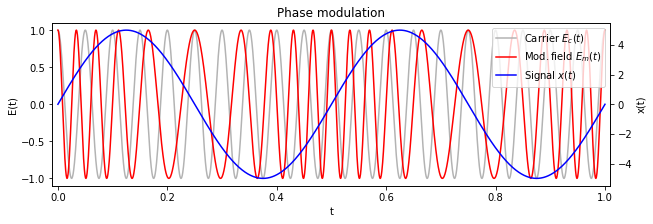

In [15]:
## Code for showing a phase modulated field ##

# Parameters
# --------------------------------------------------
t = np.linspace(0,1,2048)   # Time array
E0 = 1                      # Amplitude of the field.
fc = 20                     # Carrier freq
phi_c = 0                   # Phase of the field
fm = 2                      # Phase modulation freq
m = 5                       # Modulation index
phi_m = 0                   # Modulation phase

# Computing the fields and signal arrays
# --------------------------------------------------
# Carrier field
E = E0*np.cos(fc*2*np.pi*t + phi_c)
# Signal 
x = m*np.sin(fm*2*np.pi*t + phi_m)
# Phase modulated field
E_m = E0*np.cos(fc*2*np.pi*t + phi_c + m*np.sin(fm*2*np.pi*t+phi_m))

# Plotting
# --------------------------------------------------
fig = plt.figure(figsize=(10,3))

# Axis for carrier and modulated field
ax = plt.subplot(1,1,1)
p1 = ax.plot(t,E,'0.7', label='$\mathrm{Carrier}\ E_c(t)$')
p2 = ax.plot(t,E_m,'r',label='$\mathrm{Mod. field}\ E_m(t)$')
ax.set_xlabel('t')
ax.set_ylabel('E(t)')
ax.set_title('Phase modulation')
ax.set_xlim(-0.01,1.01)

# Second y-axis for signal
ax2 = ax.twinx()
p3 = ax2.plot(t,x,'b', label='$\mathrm{Signal}\ x(t)$')
ax2.set_ylabel('x(t)')

# The legend
plots = p1+p2+p3
labs = [lab.get_label() for lab in plots]
ax.legend(plots, labs, loc=1, fontsize=10)

# Showing figure
plt.show(fig)

In the figure above we can clearly see that (i) the phase of the modulated field oscillated around the original field, and (ii) that the amplitude is kept constant. These are two important characteristics of a purely phase modulated field.

<div style="background-color:#cceffc;padding:10px;">
    
### Task: Varying parameters

Try changing the parameters of the above modulation ($E_0$, $f_c$, $\phi_c$, $f_m$, $m$ and $\phi_m$) to get a feel for what is important.

</div>

### Phase modulation in the sideband picture

Using complex notation, a phase modulated electric field at an arbitrary fixed point in space can be described by 

$$E_\mathrm{m}(t) = E_0\exp \Big(i\big( 2\pi f_\mathrm{c} t + m\cos(2\pi f_\mathrm{m} t + \varphi_\mathrm{m})\big) \Big),$$

where the overall phase $\phi_c$ has been included in the now complex amplitude $E_0$. The tricky factor $\exp(i m \cos(2\pi f_m t + \phi_m))$ can be Taylor expanded around $m=0$. For small modulation indices ($m\ll1$), we can approximate the series well with only the first order terms of the Taylor series:

$$\begin{align}
E_\mathrm{m}(t) &= E_0\exp \Big(i\big( 2\pi f_\mathrm{c} t + m\cos(2\pi f_\mathrm{m} t + \varphi_\mathrm{m})\big) \Big) \\
&\approx E_0\exp \big( 2\pi i f_\mathrm{c} t\big) \bigg[ 1 + \frac{i m}{2}\Big( \exp\big( -i(2\pi f_\mathrm{m} t + \varphi_\mathrm{m})\big) + \exp\big( i( 2\pi f_\mathrm{m} t + \varphi_\mathrm{m})\big) \Big) \bigg] \\
&= a_0 \mathrm{e}^{2\pi i f_c t} + a_- \mathrm{e}^{2\pi i f_- t} + a_+ \mathrm{e}^{2\pi i f_+ t} ,
\end{align}$$

where $f\pm = f_c \pm f_m.$

Thus, the effect of a weak phase modulation (small $m$) is two new frequency components, one on each side of the carrier. We call these **sidebands** of the carrier. The stronger the phase modulation, the more sideband pairs are needed to be taken into account. That is, we would need to add frequency components of $f_c \pm 2 f_m$, $f_c \pm 3 f_m$, $f_c \pm 4 f_m$ and so on, as the modulation index $m$ increases.

The figure below shows how a phase modulated field can be represented in the frequency domain.

<img src="assets/phase_sidebands.png" alt="Phase modulation sidebands" width="700" >

For phase modulation the modulation index is usually small, and in gravitational wave interferometers usually well below 1, which means only a few sideband pairs are needed to be taken into account. However, to represent frequency modulation in the sideband picture, a long series of sideband pairs would usually be needed.

<div style="background-color:#cceffc;padding:10px;">
    
### Question: phase modulation sidebands

When you phase modulate a light field, how many sidebands do you create? In contrast, how many do you get with amplitude modulation? What influences the amplitude of the sidebands?

</div>

## Changes made to reflected light caused by mirror motion

What happens to the reflected light field from a moving mirror?

![Mirror phase modulation](assets/mirror-phase-modulation.png)

Let's assume sinusoidal mirror motion with frequency $f$:

$$\Delta x = m \cos( 2 \pi f t )$$

Assuming the mirror has (amplitude) reflectivity $r$, then then the reflected field $a_2$ becomes:

$$\begin{align}
a_2 &= a_1 r \exp( -i 2 k (x + \Delta x)) \\
    &= a_1 r \exp( -i 2 k (x + m \cos( 2 \pi f t )))
\end{align}$$

where $k = \frac{2 \pi}{\lambda_0}$ is the wave number and $x$ is some arbitrary distance between the mirror and the laser.

If we define our origin to be at $x = 0$, this equation simplifies to

$$
a_2 = a_1 r \exp( -2i k m \cos( 2 \pi f t ))
$$

This contains two terms that are varying sinusoidally:

1. $\exp( -2i k ... )$
2. $m \cos( 2 \pi f t )$

The first term is the light field itself, which varies at a frequency $f_0 = \frac{c_0}{\lambda_0} \approx 280 \text{THz}$.

The second term varies at $f$, i.e. the frequency of the mirror's motion. It modulates the imaginary part of the field. This is called **phase modulation**. Note that we assume here that the motion is small (as in the case of suspended optics like in LIGO) and therefore does not affect the *magnitude* of the reflected field, e.g. through misalignment of the light.

**We call the sidebands added to the light field by mirror motion *signal* sidebands.**